In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd
import glob

In [2]:
files = glob.glob("C:/Users/dilip/Untitled Folder 4/datasets/*.csv")

combined_data = pd.concat([pd.read_csv(file) for file in files], ignore_index=True)

In [3]:
print("-------------------------------------------")
# Display the first few rows of the dataset
print(combined_data.head())
print("-------------------------------------------")
# Get information about the dataset
print(combined_data.info())
print("-------------------------------------------")
# Summary statistics
print(combined_data.describe())
print("-------------------------------------------")
# Check for missing values
print(combined_data.isnull().sum())

-------------------------------------------
  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1             NaN                                   NaN  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
-------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null C

In [4]:
# Handle missing values
combined_data.dropna(inplace=True)

# Remove duplicates
combined_data.drop_duplicates(inplace=True)

In [5]:
combined_data['Order Date'] = pd.to_datetime(combined_data['Order Date'], errors='coerce')

In [6]:
# Extract year, month, and day from 'Order Date'
combined_data['Order Year'] = combined_data['Order Date'].dt.year
combined_data['Order Month'] = combined_data['Order Date'].dt.month
combined_data['Order Day'] = combined_data['Order Date'].dt.day

In [7]:
print(combined_data['Price Each'].head())

0    11.95
2    99.99
3      600
4    11.99
5    11.99
Name: Price Each, dtype: object


In [8]:
combined_data = combined_data.dropna(subset=['Price Each'])

combined_data['Price Each'] = pd.to_numeric(combined_data['Price Each'], errors='coerce')


# Histogram

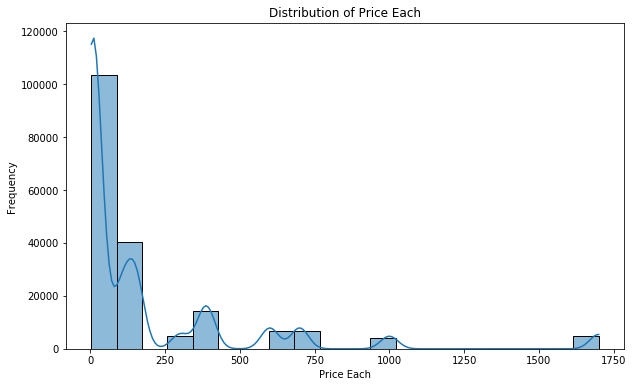

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_data, x='Price Each', bins=20, kde=True)
plt.xlabel('Price Each')
plt.ylabel('Frequency')
plt.title('Distribution of Price Each')
plt.show()


# Box Plot

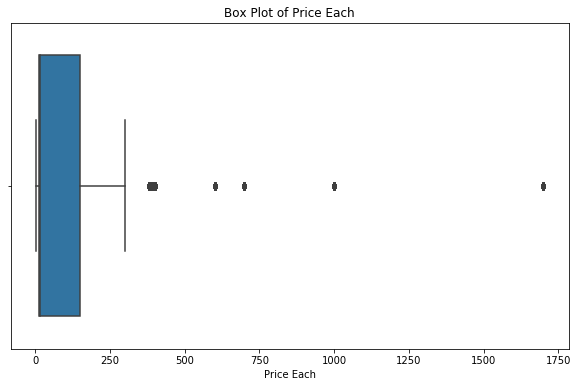

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_data, x='Price Each')
plt.xlabel('Price Each')
plt.title('Box Plot of Price Each')
plt.show()

# Scatter plot

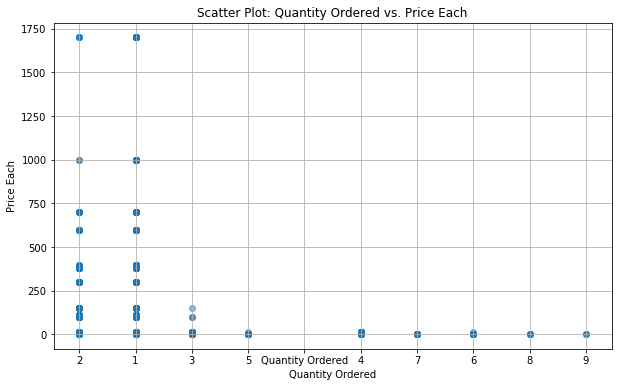

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(combined_data['Quantity Ordered'], combined_data['Price Each'], alpha=0.5)
plt.xlabel('Quantity Ordered')
plt.ylabel('Price Each')
plt.title('Scatter Plot: Quantity Ordered vs. Price Each')
plt.grid(True)
plt.show()

# Z-score

In [28]:
z_scores = stats.zscore(combined_data['Price Each'])
combined_data['Z-score'] = z_scores

outliers = combined_data[(z_scores > 3) | (z_scores < -3)]
print(outliers)



combined_data['Quantity Ordered'] = pd.to_numeric(combined_data['Quantity Ordered'], errors='coerce')
combined_data['Price Each'] = pd.to_numeric(combined_data['Price Each'], errors='coerce')
from scipy import stats

combined_data['Z-score_Quantity'] = stats.zscore(combined_data['Quantity Ordered'])
combined_data['Z-score_Price'] = stats.zscore(combined_data['Price Each'])
print(combined_data['Z-score_Quantity'].head)
print(combined_data['Z-score_Price'].head)



Empty DataFrame
Columns: [Order ID, Product, Quantity Ordered, Price Each, Order Date, Purchase Address, Order Year, Order Month, Order Day, Z-score, Z-score_Quantity, Z-score_Price]
Index: []
<bound method NDFrame.head of 0        NaN
2        NaN
3        NaN
4        NaN
5        NaN
          ..
186845   NaN
186846   NaN
186847   NaN
186848   NaN
186849   NaN
Name: Z-score_Quantity, Length: 185687, dtype: float64>
<bound method NDFrame.head of 0        NaN
2        NaN
3        NaN
4        NaN
5        NaN
          ..
186845   NaN
186846   NaN
186847   NaN
186848   NaN
186849   NaN
Name: Z-score_Price, Length: 185687, dtype: float64>


C:\Users\dilip\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.
C:\Users\dilip\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


# IQR 

In [14]:
Q1 = combined_data['Price Each'].quantile(0.25)
Q3 = combined_data['Price Each'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = combined_data[(combined_data['Price Each'] < lower_bound) | (combined_data['Price Each'] > upper_bound)]
print(outliers_iqr)

       Order ID                 Product Quantity Ordered  Price Each  \
3        176560            Google Phone                1      600.00   
9        176565      Macbook Pro Laptop                1     1700.00   
11       176567            Google Phone                1      600.00   
13       176569  27in 4K Gaming Monitor                1      389.99   
18       176574            Google Phone                1      600.00   
...         ...                     ...              ...         ...   
186836   259345         ThinkPad Laptop                1      999.99   
186841   259350            Google Phone                1      600.00   
186846   259354                  iPhone                1      700.00   
186847   259355                  iPhone                1      700.00   
186848   259356  34in Ultrawide Monitor                1      379.99   

                Order Date                         Purchase Address  \
3      2019-04-12 14:38:00     669 Spruce St, Los Angeles, CA 90

# Heat Maps

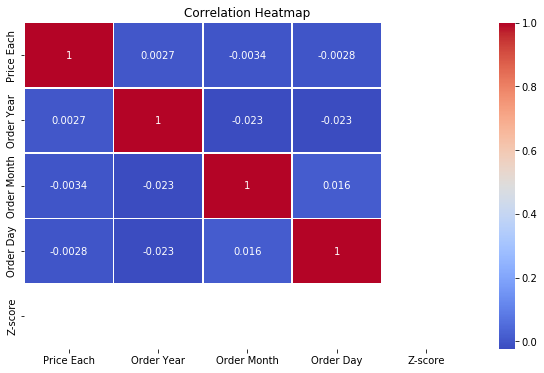

In [15]:
correlation_matrix = combined_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [16]:
combined_data.to_csv("cleaned_combined_data.csv", index=False)